### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# # In case of errors, check if you are using the correct versions of the libraries. This notebook works on the following versions of libraries. Specify these versions if you get version related errors.
# TensorFlow version: 2.17.0
# Pandas version: 2.2.2
# NumPy version: 1.26.4
# Scikit-learn version: 1.5.2
# Keras version: 3.4.1

# print("TensorFlow version:", tf.__version__)
# print("Pandas version:", pd.__version__)
# print("NumPy version:", np.__version__)
# print("Scikit-learn version:", sklearn.__version__)
# print("Keras version:", tf.keras.__version__)

### Loading data

In [4]:
!unzip MNIST_data.zip
!ls

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
data = pd.read_csv('MNIST_data/train.csv')
X_test = pd.read_csv("MNIST_data/test.csv")

In [7]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [8]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [9]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

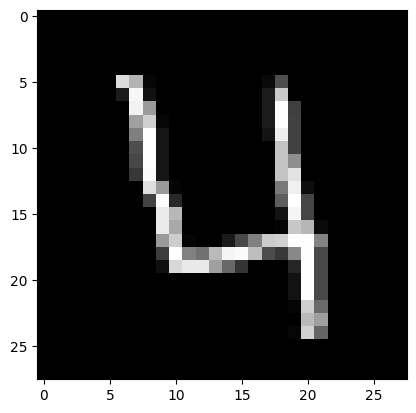

In [11]:
img = data_x.iloc[3].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [12]:
set(data_y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

In [13]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [14]:
# model = keras.Sequential([
#     keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(10, activation=tf.nn.softmax)])

# Newer versions of Keras support this:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [16]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7581 - loss: 4.5498 - val_accuracy: 0.8843 - val_loss: 0.5484
Epoch 2/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9246 - loss: 0.3061 - val_accuracy: 0.9212 - val_loss: 0.3223
Epoch 3/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9470 - loss: 0.1963 - val_accuracy: 0.9393 - val_loss: 0.2657
Epoch 4/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9593 - loss: 0.1414 - val_accuracy: 0.9407 - val_loss: 0.2307
Epoch 5/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9621 - loss: 0.1299 - val_accuracy: 0.9445 - val_loss: 0.2125


### Model evaluation

In [17]:
model.predict(X_test).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([2, 0, 9, ..., 3, 9, 2])

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
The predicted label is: 0


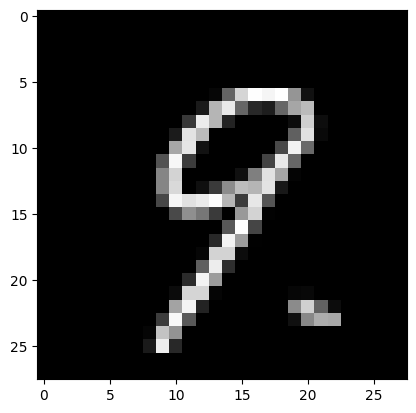

In [21]:
img = X_test.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance